# Analyzing IMDB Data in Keras

In [27]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)

## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [28]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [29]:
print(x_train[0])
print(y_train[0])

[1, 2, 2, 2, 2, 2, 5, 422, 2, 2, 41, 96, 143, 14, 2, 708, 63, 47, 6, 2, 2, 2, 841, 107, 2, 839, 295, 54, 68, 2, 2, 6, 588, 353, 2, 68, 456, 120, 34, 620, 6, 2, 837, 396, 18, 2, 11, 363, 2, 9, 31, 7, 98, 9, 2, 34, 2, 70, 25, 838, 14, 155, 158, 153, 908, 19, 670, 2, 940, 2, 2, 5, 2, 2, 2, 2, 115, 62, 28, 2, 2, 38, 76, 268, 58, 8, 2, 41, 538, 5, 13, 191, 838, 2, 2, 11, 4, 85, 217, 2, 2, 41, 483, 46, 14, 9, 6, 2, 2, 418, 7, 2, 398, 34, 6, 2, 2, 2, 625, 326, 7, 6, 52, 2, 9, 8, 868, 4, 2, 588, 7, 6, 604, 7, 2, 24, 35, 2, 7, 2, 253, 11, 4, 226, 2, 2, 300, 241, 39]
0


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [30]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[ 0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.
  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.
  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [31]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [32]:
from keras import models
from keras import layers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=1000))
model.add(Dropout(0.2))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [33]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_test, y_test), verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 226us/step - loss: 0.3935 - acc: 0.8232 - val_loss: 0.3273 - val_acc: 0.8582
Epoch 2/10
25000/25000 [==============================] - 6s 223us/step - loss: 0.3183 - acc: 0.8654 - val_loss: 0.3209 - val_acc: 0.8591
Epoch 3/10
25000/25000 [==============================] - 6s 225us/step - loss: 0.3021 - acc: 0.8733 - val_loss: 0.3310 - val_acc: 0.8583
Epoch 4/10
25000/25000 [==============================] - 6s 221us/step - loss: 0.2864 - acc: 0.8807 - val_loss: 0.3299 - val_acc: 0.8563
Epoch 5/10
25000/25000 [==============================] - 5s 219us/step - loss: 0.2739 - acc: 0.8872 - val_loss: 0.3402 - val_acc: 0.8555
Epoch 6/10
25000/25000 [==============================] - 5s 217us/step - loss: 0.2586 - acc: 0.8944 - val_loss: 0.3431 - val_acc: 0.8575
Epoch 7/10
25000/25000 [==============================] - 6s 244us/step - loss: 0.2404 - acc: 0.9035 - val_loss: 0.3531 - 

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.84854


# 7. Validating our Approach

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

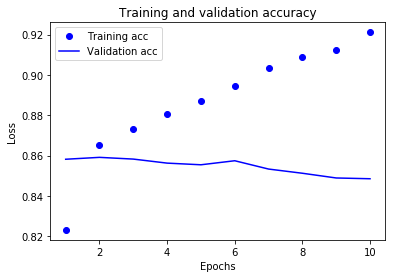

In [38]:
plt.clf()  
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()